In [1]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
# (1) 생존자의 연령
DATA_FILE = '../Data/titanic_train.csv'
dataDF = pd.read_csv(DATA_FILE)
dataDF.isna().sum()
df = dataDF.copy()
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
58.00    3
60.00    2
62.00    2
63.00    2
80.00    1
Name: Survived, Length: 65, dtype: int64

,Survived,Age
1,1,38.0
2,1,26.0
3,1,35.0
8,1,27.0
9,1,14.0
...,...,...
875,1,15.0
879,1,56.0
880,1,25.0
887,1,19.0


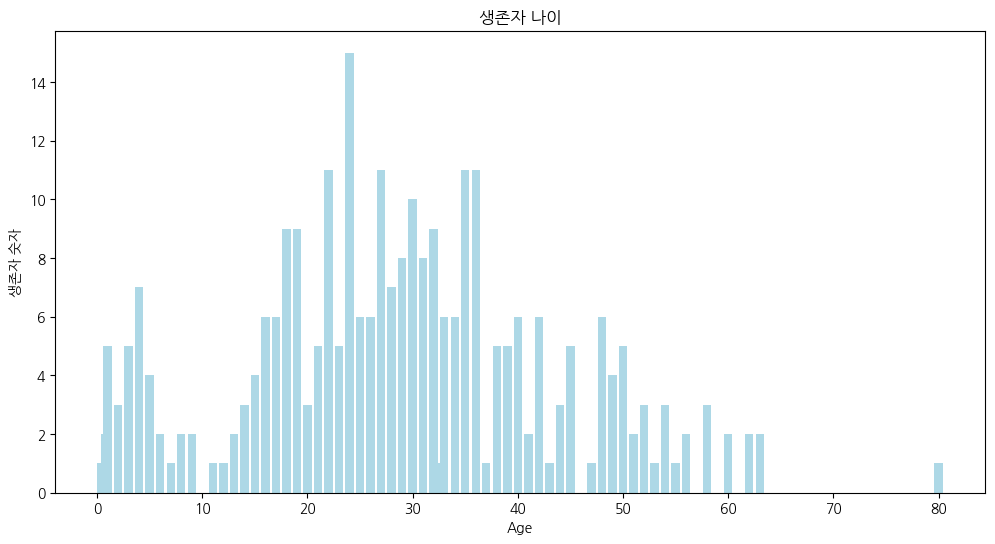

In [3]:
# 생존자 구별
age_df = df[df['Survived']==1]
# 생존자와 나이
age_df = age_df[['Survived', 'Age']]

# 나이별 생존자 수 합계
count = age_df.groupby('Age')['Survived'].sum()
display(count)
# 결측치 제거
age_df = age_df.dropna(subset=['Age'])

display(age_df)
# 나이 인덱스로
age_df = age_df.set_index('Age')

# 생성
plt.figure(figsize=(12,6))
plt.bar(count.index, count.values,color='lightblue')
plt.xlabel('Age')
plt.ylabel('생존자 숫자')
plt.title('생존자 나이')
plt.show()


Sex
female    197
male       93
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

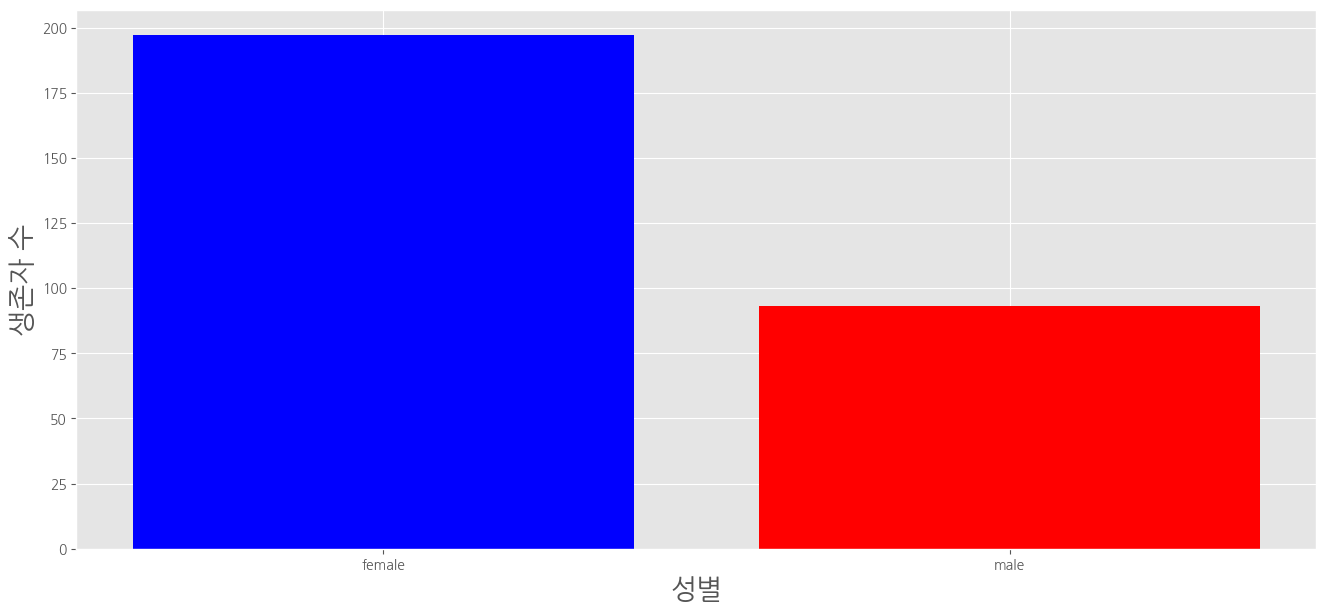

In [230]:
# (2) 생존자의 성별
## 생존자 추출
gender_df = df[df['Survived'] == 1]
# 생존자 성별 추출
gender_df = gender_df[['Survived','Sex']]

# 생존자 성별 별 합계
sum = gender_df.groupby('Sex')['Survived'].sum()
display(sum)
plt.figure(figsize=(16, 7))
plt.xlabel('성별', size = 20)
plt.ylabel('생존자 수', size = 20)
plt.bar(sum.index, sum.values, color=['blue', 'red'])

Sex,female,male
Age,,
0.42,NaN,1.0
0.67,NaN,1.0
0.75,2.0,NaN
0.83,NaN,2.0
0.92,NaN,1.0
...,...,...
58.00,3.0,NaN
60.00,1.0,1.0
62.00,1.0,1.0


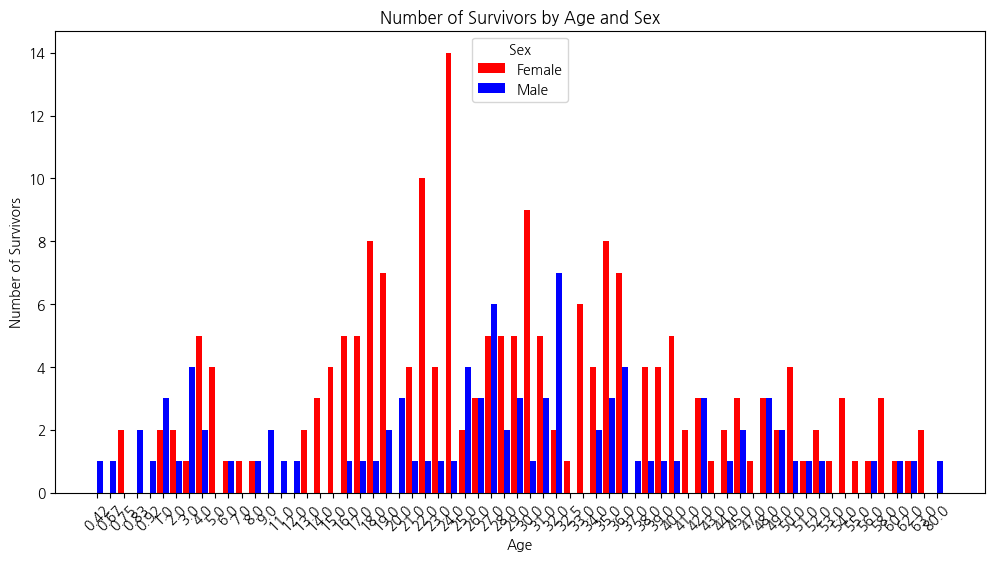

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 생존자들의 연령과 성별 분석
ga_df = df[df['Survived']==1]
ga_df = ga_df[['Sex','Age','Survived']]

# Age, Sex별 생존자 합계
sum_1 = ga_df.groupby(['Age','Sex'])['Survived'].sum().unstack()
display(sum_1)

# x축 위치
x = np.arange(len(sum_1))
w = 0.45  # 막대 폭

# 막대그래프
plt.figure(figsize=(12,6))
plt.bar(x - w/2, sum_1['female'], width=w, label='Female', color='red')
plt.bar(x + w/2, sum_1['male'], width=w, label='Male', color='blue')

# x축 라벨
plt.xticks(x, sum_1.index, rotation=45)
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Age and Sex')
plt.legend(title='Sex')
plt.show()


,Survived
Pclass,
1,122
2,83
3,85


([<matplotlib.patches.Wedge at 0x2254e883210>,
 [Text(0.27124988189986027, 1.0660316606786648, '1'),
  Text(-1.012813917800516, -0.4291945571760782, '2'),
  Text(0.6656917781860364, -0.8757022647312915, '3')],
 [Text(0.1479544810362874, 0.5814718149156354, '42.1%'),
  Text(-0.5524439551639178, -0.2341061220960426, '28.6%'),
  Text(0.36310460628329255, -0.4776557807625226, '29.3%')])

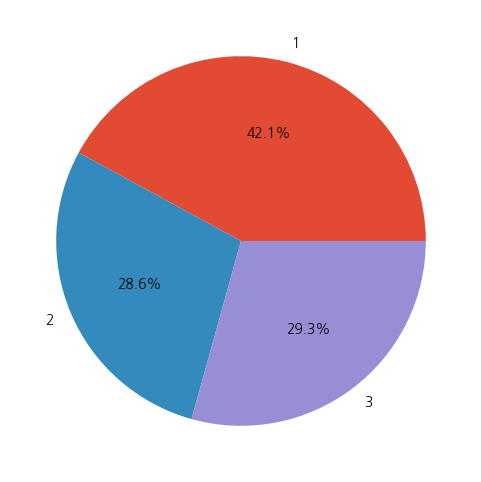

In [261]:
# (4) 등석에 따른 생존자 분석
c_df = df[df['Survived']==1]
c_df = c_df[['Survived', 'Pclass']]
c_df = c_df.set_index('Pclass')
c_sum = c_df.groupby('Pclass').sum()
display(c_sum)
plt.figure(figsize=(6,6))
plt.pie(
    c_sum['Survived'],       
    labels=c_sum.index,     
    autopct='%1.1f%%',       
)